## Project 03: K means algorithm using iris dataset from scratch

#### Name: Tanusree Debi


#### ID: 1001838957

#### 1. Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from sklearn.metrics import plot_confusion_matrix,classification_report

#### 2. Import Iris Dataset

In [2]:
iris_dataset = datasets.load_iris()

### Part 01

#### Using Sepal width and Sepal length

In [3]:
df = pd.DataFrame({
    'Sepal Length': iris_dataset.data[:,0],
    'Sepal Width': iris_dataset.data[:,1],
    'cluster' : iris_dataset.target
})

In [4]:
df

,Sepal Length,Sepal Width,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


#### Visualize the dataset

Text(0, 0.5, 'Sepal Width')

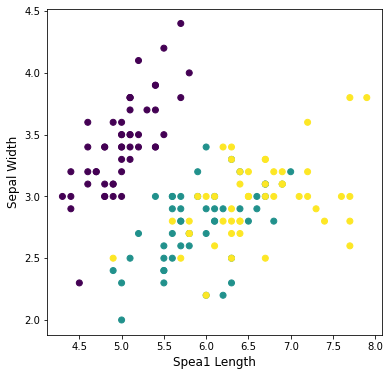

In [5]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(df['Sepal Length'],df['Sepal Width'],c=iris_dataset.target,alpha = 10)
plt.xlabel('Spea1 Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)

#### Define 3 centroids:

In [6]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['Sepal Length'].mean())
    result_list.append(df.loc[df['cluster'] == i]['Sepal Width'].mean())
    centroids[i] = result_list

In [7]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

#### Plot the centroids:

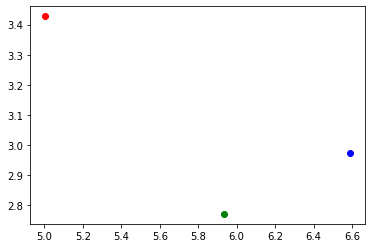

In [8]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
    
plt.show()

#### Combine datasets and 3 cluster points

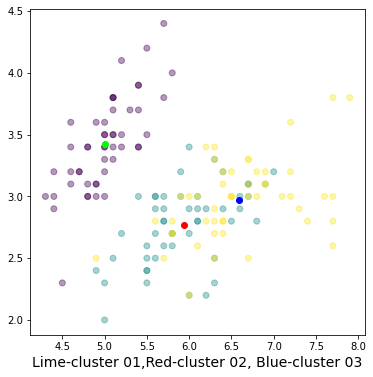

In [9]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(df['Sepal Length'], df['Sepal Width'], c=iris_dataset.target,alpha = 0.4)
colmap = {0: 'lime', 1: 'red', 2: 'blue'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i])
plt.xlabel('Lime-cluster 01,Red-cluster 02, Blue-cluster 03', fontsize=14)
plt.show()

#### Distance function for calculating the euclidian distance from datasets to cluster points and new centroids

In [10]:
def distance(df,centroids):
    for i in range(3):
        df['distance_from_centroid{}'.format(i)] = (
            np.sqrt(np.square(df['Sepal Length'] - centroids[i][0]) + np.square(df['Sepal Width'] - centroids[i][1]))
        )
    centroid_distance = ['distance_from_centroid{}'.format(i) for i in range(3)]
    df['closest_centroid'] = df.loc[:, centroid_distance].idxmin(axis=1)
    df['closest_centroid'] = df['closest_centroid'].map(lambda x: int(x.lstrip('distance_from_centroid')))
    df['color'] = df['closest_centroid'].map(lambda x: colmap[x])
    return df

In [12]:
df=distance(df,centroids)
df

,Sepal Length,Sepal Width,cluster,distance_from_centroid0,distance_from_centroid1,distance_from_centroid2,closest_centroid,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,lime
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,lime
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,lime
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,lime
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,lime
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,blue
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,red
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,blue
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,blue


#### Visualize the updated centroid points

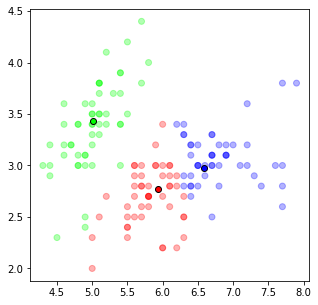

In [13]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Sepal Length'], df['Sepal Width'],color=df['color'], alpha=0.3)
for i in range(3):
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

#### Update the centroids

In [14]:
def update(centroid_n):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest_centroid'] == i]['Sepal Length'])
        centroids[i][1] = np.mean(df[df['closest_centroid'] == i]['Sepal Width'])
    return centroid_n

In [15]:
centroids=update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

#### Plot the centroid points

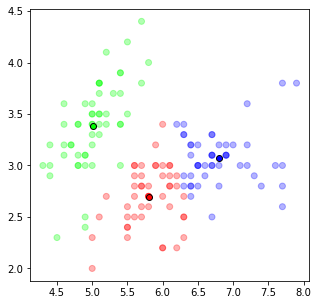

In [16]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Sepal Length'], df['Sepal Width'], color=df['color'], alpha=0.3)
for i in range(3):
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
plt.show()

In [17]:
df = distance(df, centroids)
df

,Sepal Length,Sepal Width,cluster,distance_from_centroid0,distance_from_centroid1,distance_from_centroid2,closest_centroid,color
0,5.1,3.5,0,0.147942,1.071654,1.755866,0,lime
1,4.9,3.0,0,0.398346,0.956435,1.903325,0,lime
2,4.7,3.2,0,0.359507,1.216416,2.106177,0,lime
3,4.6,3.1,0,0.497731,1.272661,2.202305,0,lime
4,5.0,3.6,0,0.217186,1.212803,1.878758,0,lime
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.733412,0.944843,0.123075,2,blue
146,6.3,2.5,2,1.563740,0.530569,0.758659,1,red
147,6.5,3.0,2,1.538990,0.758404,0.309808,2,blue
148,6.2,3.4,2,1.190687,0.808547,0.687191,2,blue


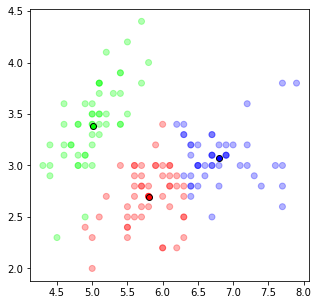

In [19]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Sepal Length'], df['Sepal Width'], color=df['color'], alpha=0.3)
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

#### Repeat the update function until centroid points fixed

In [20]:
while True:
    closest_centroids = df['closest_centroid'].copy(deep=True)
    centroids = update(centroids)
    df = distance(df, centroids)
    if closest_centroids.equals(df['closest_centroid']):
        break

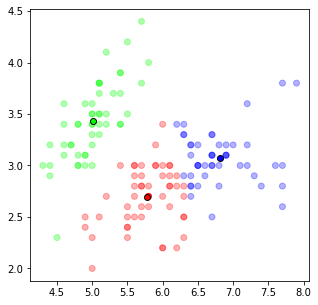

In [21]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Sepal Length'], df['Sepal Width'], color=df['color'],alpha=0.3)
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()

In [22]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.773584905660377, 2.692452830188679],
 2: [6.812765957446806, 3.0744680851063824]}

In [23]:
df

,Sepal Length,Sepal Width,cluster,distance_from_centroid0,distance_from_centroid1,distance_from_centroid2,closest_centroid,color
0,5.1,3.5,0,0.118406,1.051594,1.764836,0,lime
1,4.9,3.0,0,0.440931,0.926140,1.914215,0,lime
2,4.7,3.2,0,0.381602,1.187514,2.116492,0,lime
3,4.6,3.1,0,0.521939,1.242335,2.212913,0,lime
4,5.0,3.6,0,0.172105,1.192508,1.887407,0,lime
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.976130,0.135136,2,blue
146,6.3,2.5,2,1.592363,0.560492,0.770028,1,red
147,6.5,3.0,2,1.554098,0.788837,0.321509,2,blue
148,6.2,3.4,2,1.194328,0.826107,0.693868,2,blue


#### Plot the actual data vs predicted cluster results

Text(0.5, 1.0, 'Predicted')

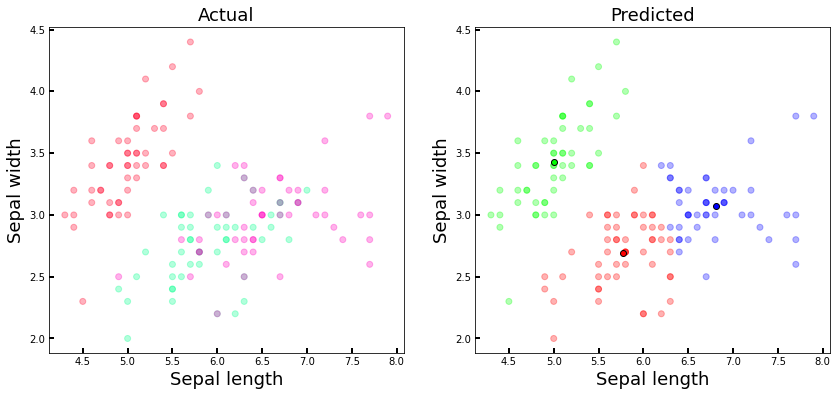

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['Sepal Length'], y=df['Sepal Width'], c=iris_dataset.target, cmap='gist_rainbow',alpha=0.3)

axes[1].scatter(df['Sepal Length'], df['Sepal Width'],color=df['color'],alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=5, width=2, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=5, width=2, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

#### Confussion matrix for actual result vs predicted result

In [25]:
pd.crosstab(iris_dataset.target,closest_centroids)

closest_centroid,0,1,2
row_0,,,
0,50,0,0
1,0,38,12
2,0,15,35


In [26]:
print(classification_report(iris_dataset.target,closest_centroids))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.76      0.74        50
           2       0.74      0.70      0.72        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



### Part 02

#### Using Petal length and Petal width

In [27]:
df2 = pd.DataFrame({
    'Petal Length': iris_dataset.data[:,2],
    'Petal Width': iris_dataset.data[:,3],
    'cluster' : iris_dataset.target
})

In [28]:
df2

,Petal Length,Petal Width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


#### Visualize the dataset

Text(0, 0.5, 'Petal Width')

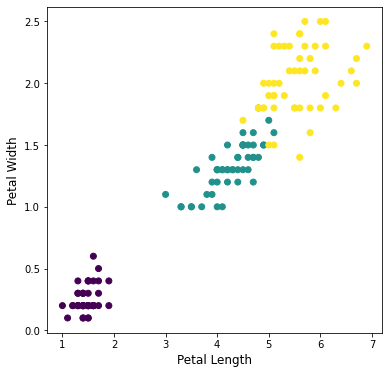

In [29]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(df2['Petal Length'],df2['Petal Width'],c=iris_dataset.target,alpha = 10)
plt.xlabel('Petal Length', fontsize=12)
plt.ylabel('Petal Width', fontsize=12)

#### Define 3 centroids

In [30]:
centroids2 = {}
for i in range(3):
    result_list2 = []
    result_list2.append(df2.loc[df2['cluster'] == i]['Petal Length'].mean())
    result_list2.append(df2.loc[df2['cluster'] == i]['Petal Width'].mean())
    centroids2[i] = result_list2

In [31]:
centroids2

{0: [1.4620000000000002, 0.2459999999999999],
 1: [4.26, 1.3259999999999998],
 2: [5.552, 2.026]}

#### Plot the centroids

In [ ]:
colmap = {0: 'm', 1: 'r', 2: 'c'}
for i in range(3):
    plt.scatter(centroids2[i][0],centroids2[i][1], color=colmap[i])
    
plt.show()

#### Combine daatsets and 3 cluster points

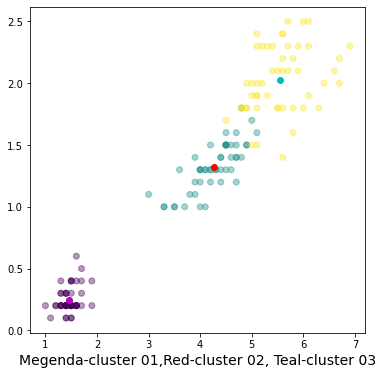

In [32]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(df2['Petal Length'], df2['Petal Width'], c=iris_dataset.target,alpha = 0.4)
colmap = {0: 'm', 1: 'r', 2: 'c'}
for i in range(3):
    plt.scatter(centroids2[i][0],centroids2[i][1], c=colmap[i])
plt.xlabel('Megenda-cluster 01,Red-cluster 02, Teal-cluster 03', fontsize=14)
plt.show()

#### Distance function for calculating the euclidian distance from datasets to cluster points and new centroids

In [33]:
def distance2(df2,centroids2):
    for i in range(3):
        df2['distance_from_centroid{}'.format(i)] = (
            np.sqrt(np.square(df2['Petal Length'] - centroids2[i][0]) + np.square(df2['Petal Width'] - centroids2[i][1]))
        )
    centroid_distance2 = ['distance_from_centroid{}'.format(i) for i in range(3)]
    df2['closest_centroid'] = df2.loc[:, centroid_distance2].idxmin(axis=1)
    df2['closest_centroid'] = df2['closest_centroid'].map(lambda x: int(x.lstrip('distance_from_centroid')))
    df2['color'] = df2['closest_centroid'].map(lambda x: colmap[x])
    return df2

In [35]:
df2=distance2(df2,centroids2)
df2

,Petal Length,Petal Width,cluster,distance_from_centroid0,distance_from_centroid1,distance_from_centroid2,closest_centroid,color
0,1.4,0.2,0,0.077201,3.073675,4.535789,0,m
1,1.4,0.2,0,0.077201,3.073675,4.535789,0,m
2,1.3,0.2,0,0.168404,3.166935,4.627503,0,m
3,1.5,0.2,0,0.059666,2.980852,4.444432,0,m
4,1.4,0.2,0,0.077201,3.073675,4.535789,0,m
...,...,...,...,...,...,...,...,...
145,5.2,2.3,2,4.265157,1.353616,0.446072,2,c
146,5.0,1.9,2,3.905529,0.936523,0.566198,2,c
147,5.2,2.0,2,4.129063,1.156666,0.352959,2,c
148,5.4,2.3,2,4.441482,1.499425,0.313337,2,c


#### Visualize the updated centroid points

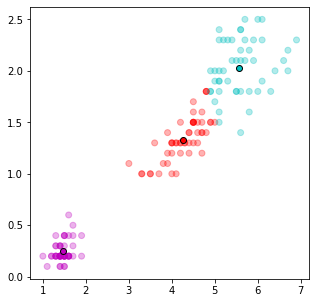

In [36]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['Petal Length'], df2['Petal Width'],color=df2['color'], alpha=0.3)
for i in range(3):
    plt.scatter(*centroids2[i], color=colmap[i], edgecolor='k')

plt.show()

#### Update the centroids:

In [37]:
def update2(centroid_n):
    for i in range(3):
        centroids2[i][0] = np.mean(df2[df2['closest_centroid'] == i]['Petal Length'])
        centroids2[i][1] = np.mean(df2[df2['closest_centroid'] == i]['Petal Width'])
    return centroid_n

In [38]:
centroids2=update2(centroids2)
centroids2

{0: [1.4620000000000002, 0.2459999999999999],
 1: [4.269230769230769, 1.342307692307692],
 2: [5.595833333333332, 2.0374999999999996]}

#### Plot centroids

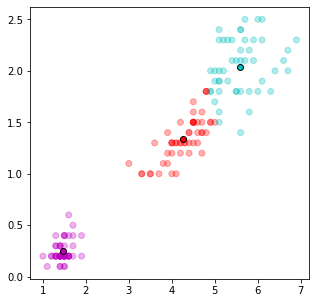

In [39]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['Petal Length'], df2['Petal Width'], color=df2['color'], alpha=0.3)
for i in range(3):
    plt.scatter(*centroids2[i], color=colmap[i], edgecolor='k')
plt.show()

In [40]:
df2 = distance2(df2, centroids2)
df2

,Petal Length,Petal Width,cluster,distance_from_centroid0,distance_from_centroid1,distance_from_centroid2,closest_centroid,color
0,1.4,0.2,0,0.077201,3.088260,4.580548,0,m
1,1.4,0.2,0,0.077201,3.088260,4.580548,0,m
2,1.3,0.2,0,0.168404,3.181383,4.672322,0,m
3,1.5,0.2,0,0.059666,2.995581,4.489127,0,m
4,1.4,0.2,0,0.077201,3.088260,4.580548,0,m
...,...,...,...,...,...,...,...,...
145,5.2,2.3,2,4.265157,1.335480,0.474963,2,c
146,5.0,1.9,2,3.905529,0.919263,0.611493,2,c
147,5.2,2.0,2,4.129063,1.139689,0.397606,2,c
148,5.4,2.3,2,4.441482,1.481828,0.327501,2,c


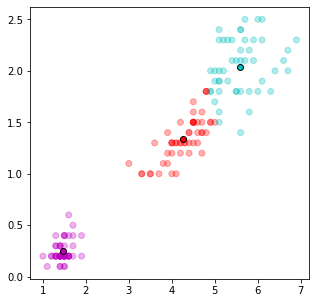

In [41]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['Petal Length'], df2['Petal Width'], color=df2['color'], alpha=0.3)
for i in range(3):
    plt.scatter(centroids2[i][0],centroids2[i][1], color=colmap[i], edgecolor='k')
plt.show()

#### Repeat the update function until centroid points fixed

In [42]:
while True:
    closest_centroids2 = df2['closest_centroid'].copy(deep=True)
    centroids2 = update2(centroids2)
    df2 = distance2(df2, centroids2)
    if closest_centroids2.equals(df2['closest_centroid']):
        break

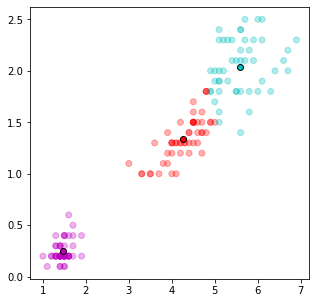

{0: [1.4620000000000002, 0.2459999999999999],
 1: [4.269230769230769, 1.342307692307692],
 2: [5.595833333333332, 2.0374999999999996]}

In [43]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['Petal Length'], df2['Petal Width'], color=df2['color'],alpha=0.3)
for i in range(3):
    plt.scatter(centroids2[i][0],centroids2[i][1], color=colmap[i], edgecolor='k')

plt.show()
centroids2


In [44]:
df2

,Petal Length,Petal Width,cluster,distance_from_centroid0,distance_from_centroid1,distance_from_centroid2,closest_centroid,color
0,1.4,0.2,0,0.077201,3.088260,4.580548,0,m
1,1.4,0.2,0,0.077201,3.088260,4.580548,0,m
2,1.3,0.2,0,0.168404,3.181383,4.672322,0,m
3,1.5,0.2,0,0.059666,2.995581,4.489127,0,m
4,1.4,0.2,0,0.077201,3.088260,4.580548,0,m
...,...,...,...,...,...,...,...,...
145,5.2,2.3,2,4.265157,1.335480,0.474963,2,c
146,5.0,1.9,2,3.905529,0.919263,0.611493,2,c
147,5.2,2.0,2,4.129063,1.139689,0.397606,2,c
148,5.4,2.3,2,4.441482,1.481828,0.327501,2,c


#### Plot the actual result vs predcited result

Text(0.5, 1.0, 'Predicted')

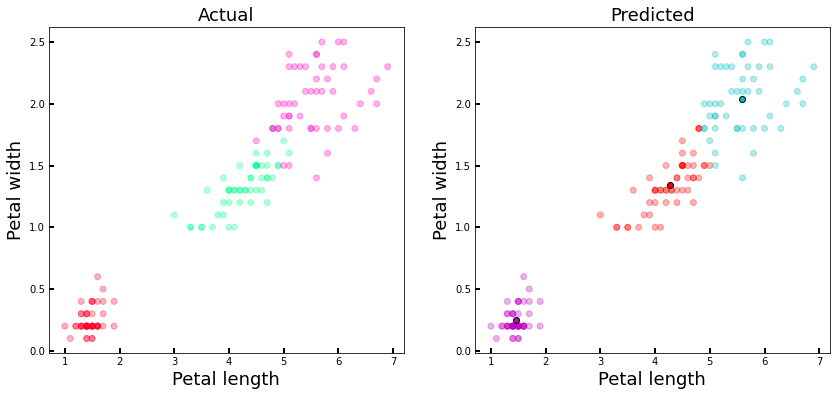

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df2['Petal Length'], y=df2['Petal Width'], c=iris_dataset.target, cmap='gist_rainbow',alpha=0.3)

axes[1].scatter(df2['Petal Length'], df2['Petal Width'], color=df2['color'],alpha=0.3)
for i in range(3):
    plt.scatter(centroids2[i][0],centroids2[i][1], color=colmap[i], edgecolor='k')
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=5, width=2, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=5, width=2, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [46]:
pd.crosstab(iris_dataset.target,closest_centroids2)

closest_centroid,0,1,2
row_0,,,
0,50,0,0
1,0,48,2
2,0,4,46


In [47]:
print(classification_report(iris_dataset.target,closest_centroids2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



### Part 03: Using K-means function from sklearn libraries

In [48]:
iris = datasets.load_iris()

In [49]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [50]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

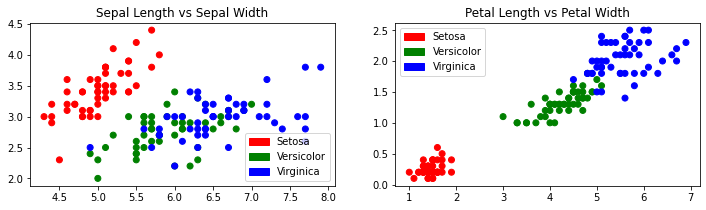

In [51]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [52]:
k_mean_model = KMeans(n_clusters=3)
k_mean_model.fit(x)

KMeans(n_clusters=3)

In [53]:
print(k_mean_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [54]:
print(k_mean_model.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


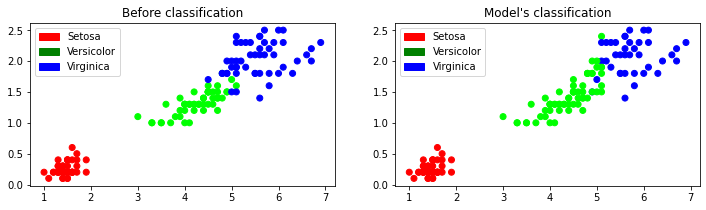

In [55]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'lime', 'blue'])

predictedY = np.choose(k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [56]:
sm.accuracy_score(predictedY, y['Target'])

0.8933333333333333

In [57]:
sm.confusion_matrix(predictedY, y['Target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

#### We can check the "goodness" of the fit by looking at model.inertia_, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit

In [60]:
k_mean_model.inertia_

78.851441426146

### Comparing with KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [62]:
X = iris.data
Y = iris.target

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state = 4)
print (X_train.shape)
print (X_test.shape)

(90, 4)
(60, 4)


In [64]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### Comparing with AgglomerativeClustering

In [65]:
from sklearn.cluster import AgglomerativeClustering
i = AgglomerativeClustering(n_clusters=3)
i_pred = i.fit_predict(iris.data)

In [66]:
complete_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_pred =complete_cluster.fit_predict(iris.data)
avg_cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred = avg_cluster.fit_predict(iris.data)

In [67]:
from sklearn.metrics import adjusted_rand_score
i_score = adjusted_rand_score(iris.target, i_pred)

In [68]:
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

In [70]:
print( "Scores: \nWard:", i_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7311985567707745 
Complete:  0.64225125183629 
Average:  0.7591987071071522
